In [2]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [124]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/protein.test"

In [125]:
global_model = GlobalDistribution.load(model_path)

In [126]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

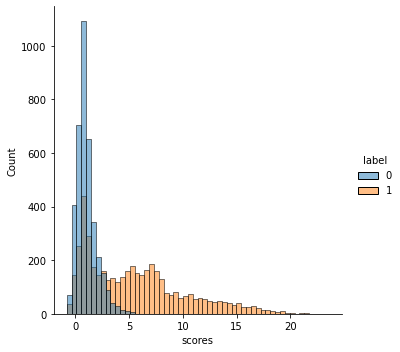

In [127]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [128]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [129]:
decoy_values[0] / decoy_values[1]

0.6687743190661478

In [130]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [131]:
function_check

,label,scores,type
0,-0.803136,0.008070,Target
1,-0.778750,0.009279,Target
2,-0.754363,0.010686,Target
3,-0.729976,0.012165,Target
4,-0.705590,0.013833,Target
...,...,...,...
995,23.461612,0.000320,Target
996,23.485998,0.000326,Target
997,23.510385,0.000330,Target
998,23.534772,0.000332,Target


In [132]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

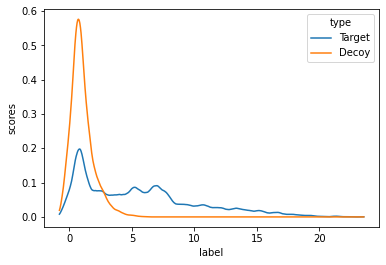

In [133]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [135]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.        , 0.        , 0.        , ..., 0.00331403, 0.00892149,
       0.005666  ])